In [1]:
import numpy as np
import fiducial as fid
import matplotlib.pyplot as plt
import utils as u
import Eg_cov as egcov
import joint_cov as jp
import pyccl.nl_pt as pt

Check what happens when you use a nonlinear galaxy bias to the linear scale cuts.

Set up parameters etc

In [2]:
lens = 'DESI'
src = 'LSSTY10'

Pimax=300.
#rp_bin_edges = np.logspace(np.log10(rp0), np.log10(50.), 11)
endfilename='_Jan25'
#rp_bin_c = u.rp_bins_mid(rp_bin_edges)
# Let's use the same cosmological parameters as Shadab's simulations:
h=0.69
OmB = 0.022/h**2

# Using now nonlinear bias parameters as fit in Kitanis & White 2022. 
# They fit LTP parameters so we convert these to their Eulerian equivalents.
b1_LPT = 1.333
b2_LPT = 0.514
bs_LPT = 0 # They fix this to 0.

# Convert to Eulerian using the conversions in Chen, Vlah & White 2020 (these use the same convention as Kitanis & White 2022)
b1 = 1.0 + b1_LPT
b2 = b2_LPT + 8./21.*(b1_LPT)
bs = bs_LPT - 2./7*(b1_LPT)

#b1 = 2.03
#b2 = 0.9*(b1-1.0)**2-0.5 # From Fast-PT example notebook which says 
#'(this is a numerical fit to simulation k2Pnl1_regdata, but a relationship of this form is motivated in the spherical collapse picture'
#bs = -4.0/7.0*(b1-1.0) # The 'coevolution value' see Pandey et al. DES Y3 papers

params = {'mu_0': 0., 'sigma_0':0., 'OmB':OmB, 'h':h, 'n_s':0.965, 'A_s':2.115 * 10**(-9),'b':b1, 'OmM': 0.292, 'b_2':b2, 'b_s': bs} 

#Nsamps=100000

print('b1=', b1)
print('b2=', b2)
print('bs=', bs)


b1= 2.333
b2= 1.021809523809524
bs= -0.38085714285714284


In [3]:
rp0 = 1.5

rp_bin_c_raw = np.loadtxt('../data_for_Danielle/test-HOD-PB00-z0.75-w1pz_cat-zRSD-model-5-gxm-sel-crossparticles-wtag-w1-rfact10-bin1-wp-logrp-pi-NJN-100.txt.upsilon')[:,0]
rp_bin_edges_raw = u.rp_bin_edges_log(rp_bin_c_raw)
#Cut below rp0 making sure rp0 is in the lowest bin. Go one bin lower because this 
ind = next(j[0] for j in enumerate(rp_bin_edges_raw) if j[1]>rp0)-1
rp_bin_c = rp_bin_c_raw[ind:]
rp_bin_edges = rp_bin_edges_raw[ind:]

print('rp bin c=', rp_bin_c)
print('rp bin edges=', rp_bin_edges)

rp bin c= [ 1.39357881  1.83709466  2.42176242  3.19250463  4.20854074  5.54793718  7.31360558  9.64120984 12.70958983 16.75450244 22.08673575 29.11598823 38.38234769 50.59778848 66.70087562 87.92887875]
rp bin edges= [  1.21375641   1.60004256   2.10926689   2.78055529   3.66548575   4.83205129   6.36988417   8.39714273  11.06958999  14.5925616   19.23674266  25.35896564  33.42962733  44.0688315   58.09403408  76.5828519  100.95586057]


Get data covariance matrices for E_G and the joint probes case.

In [4]:
#Dcov_jp = jp.get_joint_covariance(params, lens, src, rp_bin_edges, rp_bin_c, rp0, endfilename)
#np.savetxt('/home/danielle/Documents/CMU/Research/EG_comparison/txtfiles/Dcov_jp_'+endfilename+'.txt', Dcov_jp)
Dcov_jp = np.loadtxt('../txtfiles/sims_cov_myunits_wSN_Jan25_LSSTY10.dat')

In [5]:
#Dcov_eg = egcov.get_egcov(params, rp_bin_edges, rp_bin_c, rp0, lens, src, Pimax, Nsamps, endfilename)
#np.savetxt('/home/danielle/Documents/CMU/Research/EG_comparison/txtfiles/Dcov_eg_'+endfilename+'.txt', Dcov_eg)
Dcov_eg = np.loadtxt('../txtfiles/sims_egcov_myunits_wSN_Jan25_LSSTY10.txt')

In [6]:
# Visualise the inverse covariance to understand the cuts:
inv_cov_eg = np.linalg.pinv(Dcov_eg)

/tmp/ipykernel_21567/3848804684.py:2: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(inv_cov_eg))
/tmp/ipykernel_21567/3848804684.py:4: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(-inv_cov_eg), cmap=plt.cm.magma)


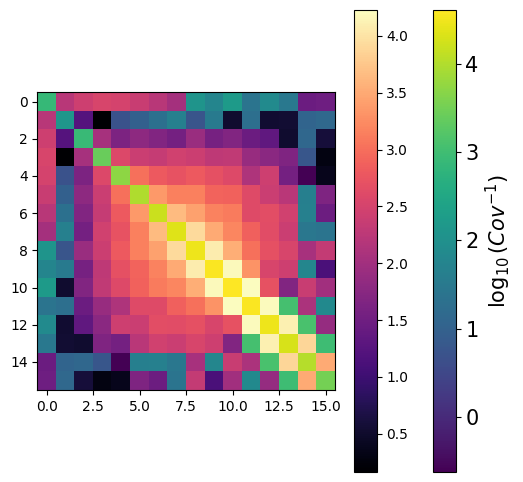

In [23]:
plt.figure(figsize=[6,6])
plt.imshow(np.log10(inv_cov_eg))
cbar1=plt.colorbar()
plt.imshow(np.log10(-inv_cov_eg), cmap=plt.cm.magma)
cbar2=plt.colorbar()
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
cbar1.ax.tick_params(labelsize=15)
#cbar2.ax.tick_params(labelsize=15)
cbar1.set_label('$\log_{10}(Cov^{-1})$', fontsize=15)
#cbar2.set_label('$\log_{10}(-Cov)$', fontsize=15)
#plt.savefig('../plots/hybrid_Egcov_log10.pdf')
plt.show()

Get the linear and nonlinear datavector for E_G

In [7]:
# Get linear datavector
data_lin_EG = fid.E_G(params, rp_bin_edges, rp0, lens, src, Pimax, endfilename, nonlin=False)
# Get nonlinear datavector
data_nl_EG = fid.E_G(params, rp_bin_edges, rp0, lens, src, Pimax, endfilename, nonlin=True, nl_bias=True)

getting Upgg
getting Upgm
maxchi= 6669.353003473356
getting Upgg
Warning, you selected a extrap_high that is less than k_max. Therefore no extrapolation will be done.
getting Upgm
Warning, you selected a extrap_high that is less than k_max. Therefore no extrapolation will be done.
maxchi= 6669.353003473356


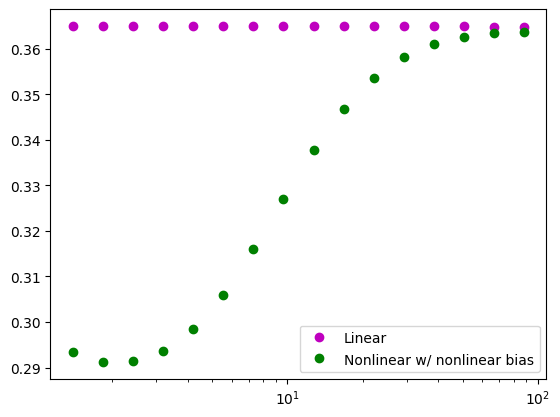

In [8]:
plt.figure()
plt.semilogx(rp_bin_c, data_lin_EG, 'mo', label='Linear')
plt.semilogx(rp_bin_c, data_nl_EG, 'go', label='Nonlinear w/ nonlinear bias')
plt.legend()
plt.show()

Get scale cuts for Eg

In [9]:
cut_inds_Eg = u.linear_scale_cuts_hartlap(data_nl_EG, data_lin_EG, Dcov_eg, rp_bin_c, covsamps=100)

hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8383838383838383
hartlap= 0.8484848484848485
hartlap= 0.8484848484848485
hartlap= 0.8484848484848485
hartlap= 0.8484848484848485
hartlap= 0.8484848484848485
hartlap= 0.8484848484848485
hartlap= 0.8484848484848485
hartlap= 0.8484848484848485
hartlap= 0.8484848484848485
hartlap= 0.8484848484848485
hartlap= 0.8484848484848485
hartlap= 0.8484848484848485
hartlap= 0.8484848484848485
hartlap= 0.8484848484848485
hartlap= 0.8484848484848485
hartlap= 0.8585858585858586
hartlap= 0.8585858585858586
hartlap= 0.8585858585858586
hartlap= 0.8585858585858586
hartlap= 0.858585858

In [10]:
print("cut indices=", cut_inds_Eg)

cut indices= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


Now get the linear and nonlinear data vectors for the joint probes case

In [11]:
data_lin_jp = fid.jp_datavector(params, rp_bin_edges, rp0, lens,src, Pimax, endfilename, nonlin = False)
data_nl_jp = fid.jp_datavector(params, rp_bin_edges, rp0, lens,src, Pimax, endfilename, nonlin = True, nl_bias=True)

maxchi= 6669.353003473356
Warning, you selected a extrap_high that is less than k_max. Therefore no extrapolation will be done.
Warning, you selected a extrap_high that is less than k_max. Therefore no extrapolation will be done.
maxchi= 6669.353003473356


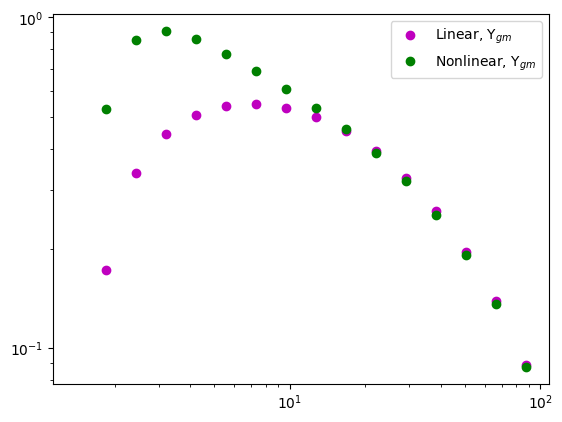

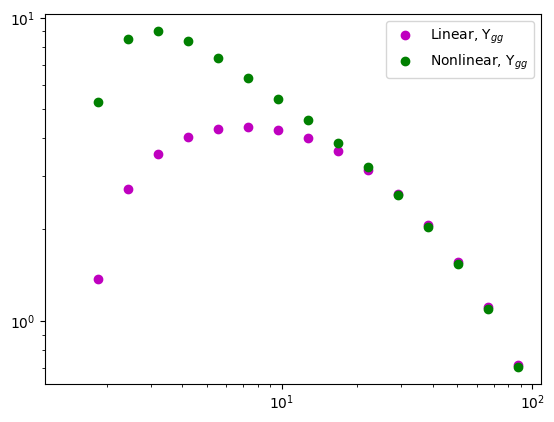

beta, lin= 0.342906677696308
beta, nl= 0.342906677696308


In [12]:
plt.figure()
plt.loglog(rp_bin_c, data_lin_jp[0:len(rp_bin_c)], 'mo', label='Linear, $\\Upsilon_{gm}$')
plt.loglog(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'go', label='Nonlinear, $\\Upsilon_{gm}$')
plt.legend()
plt.show()

plt.figure()
plt.loglog(rp_bin_c, data_lin_jp[len(rp_bin_c):2*len(rp_bin_c)], 'mo', label='Linear, $\\Upsilon_{gg}$')
plt.loglog(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'go', label='Nonlinear, $\\Upsilon_{gg}$')
plt.legend()
plt.show()

# Check that beta is the same in the linear or nonlinear case
print("beta, lin=", data_lin_jp[-1])
print("beta, nl=", data_nl_jp[-1])

In [13]:
cut_inds_jp = u.linear_scale_cuts_hartlap(data_nl_jp, data_lin_jp, Dcov_jp, rp_bin_c, covsamps=100)

hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6767676767676768
hartlap= 0.6767676767676768
hartlap= 0.676767676

In [14]:
print("cut indices=", cut_inds_jp)

cut indices= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32]


For joint probes, we disect this to find the elements to cut for individual probes.

In [15]:
cut_indices_gm = [ind for ind in cut_inds_jp if ind<len(rp_bin_c)]
ind_keep_gm = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gm]
rp_keep_gm = rp_bin_c[ind_keep_gm]
Ups_keep_gm = data_nl_jp[ind_keep_gm]
print(zip(rp_keep_gm, Ups_keep_gm))

cut_indices_gg = [(ind-len(rp_bin_c)) for ind in cut_inds_jp if ind>=len(rp_bin_c)]
ind_keep_gg = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gg]
ind_keep_gg_dvec = [ind+len(rp_bin_c) for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gg]
rp_keep_gg = rp_bin_c[ind_keep_gg]
Ups_keep_gg = data_nl_jp[ind_keep_gg_dvec]
print(zip(rp_keep_gg, Ups_keep_gg))

ind_keep_Eg = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_inds_Eg]
rp_keep_Eg = rp_bin_c[ind_keep_Eg]
Eg_keep = data_nl_EG[ind_keep_Eg]

Plot the data points this tells us to keep for joint probes (not many)

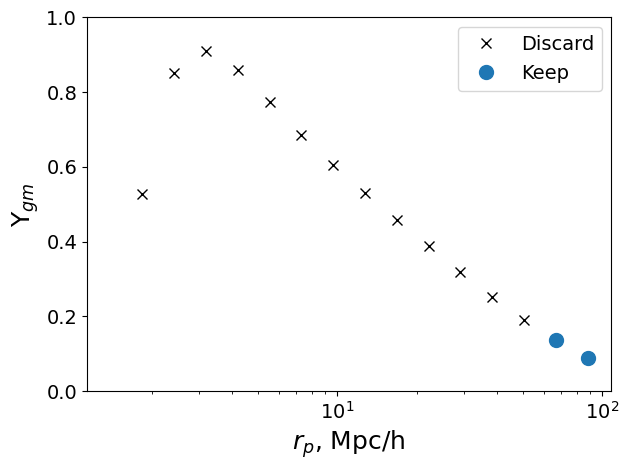

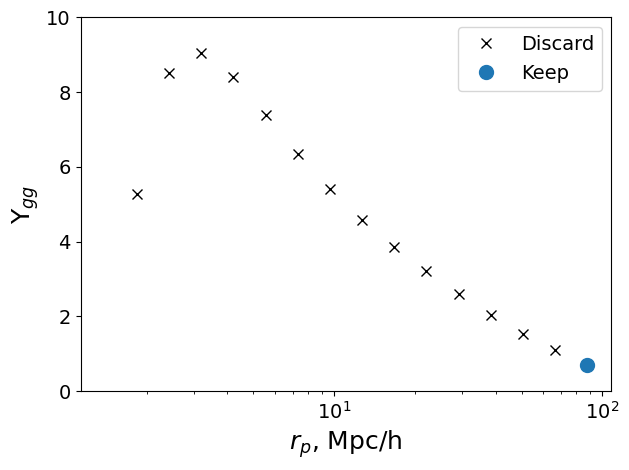

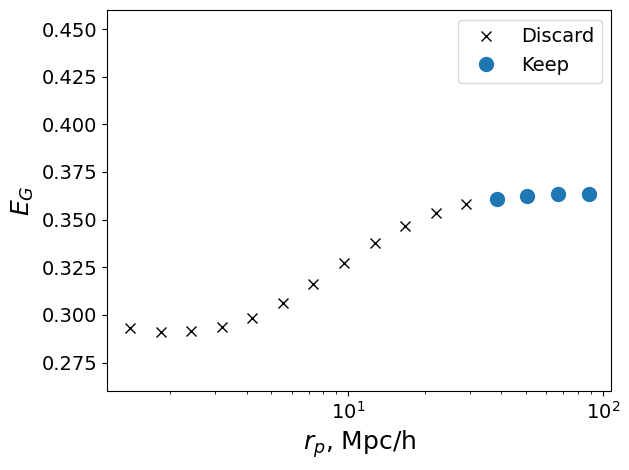

In [16]:
plt.figure()
plt.semilogx(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_gm, Ups_keep_gm, 'o', markersize='10',label='Keep')
plt.ylabel('$\\Upsilon_{gm}$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.ylim(0,1.0)
plt.tight_layout()
#plt.savefig('../plots/Upsilon_gm_linearscales_nLbias_KitanisWhite2022_wHartlap.pdf')
plt.show()

plt.figure()
plt.semilogx(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_gg, Ups_keep_gg, 'o', markersize='10', label='Keep')
plt.ylabel('$\\Upsilon_{gg}$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.ylim(0,10)
plt.tight_layout()
#plt.savefig('../plots/Upsilon_gg_linearscales_nLbias_KitanisWhite2022_wHartlap.pdf')
#plt.show()
#plt.savefig('../plots/Upsilon_gg_scales.png')

plt.figure()
plt.semilogx(rp_bin_c, data_nl_EG, 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_Eg, Eg_keep, 'o', markersize='10',label='Keep')
plt.ylabel('$E_G$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h',fontsize=18)
plt.ylim(0.26,0.46)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
#plt.savefig('../plots/EG_linearscales_nLbias_KitanisWhite2022_wHartlap.pdf')
#plt.show()

In [17]:
# Output the scale cuts in a readable format for later use.

cut = np.ones(len(rp_bin_c))
for i in range(0, len(rp_bin_c)):
    if i in cut_inds_Eg:
        cut[i] = 0

print('cut bins Eg=', cut_inds_Eg)
print('cut=', cut)

save_cuts = np.column_stack((rp_bin_c, cut))

np.savetxt('../txtfiles/scalecuts_nLbias_KitanidisWhite2022_Y10.dat', save_cuts, header='# rp bin centre,  cut this bin? 0 = Cut.')

cut bins Eg= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
cut= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]


In [18]:
# Check if the v1 version of the scale cuts actually does give a chi2<=1 when doing the cut more properly.

cut_EG_cov = np.delete(np.delete(Dcov_eg, cut_inds_Eg,axis=0),cut_inds_Eg,axis=1)
cut_EG_invcov = np.linalg.pinv(cut_EG_cov)
print('cut_EG_invcov=', cut_EG_invcov)
Eg_keep_lin = data_lin_EG[ind_keep_Eg]
delta_keep = Eg_keep - Eg_keep_lin
print('delta keep=', delta_keep)

chi2_eg_proper = np.dot(delta_keep, np.dot(cut_EG_invcov, delta_keep))
print('chi2 with v1 cut=', chi2_eg_proper)

cut_EG_invcov= [[ 125202.06501958 -128606.29448473   -3069.04900691    6862.99782975    3689.45017242   -1020.94751022]
 [-128606.29448473  267421.12726117 -149469.91733381   10783.93077262   10587.5306412    -5064.4483949 ]
 [  -3069.04900691 -149469.91733381  215467.6029004   -72575.21163344     433.39977782    5712.69037316]
 [   6862.99782975   10783.93077262  -72575.21163344   89941.9828391   -43933.0946901     6814.74779133]
 [   3689.45017242   10587.5306412      433.39977782  -43933.0946901    43461.70199089  -12104.01742626]
 [  -1020.94751022   -5064.4483949     5712.69037315    6814.74779133  -12104.01742626    5706.15422954]]
delta keep= [-3.90152130e-03 -1.79519498e-03 -5.99160836e-04  6.32652275e-06  2.60606873e-04  3.71351198e-04]
chi2 with v1 cut= 0.6984565916383918


Why does the nonlinear dip below the linear at intermediate scales? Edit: Figured this out, it's a physical feature due to the nonlinear impact from void growth at intermediate scales, see HMCode-2020 paper.

In [ ]:
wgg_lin = fid.wgg(params, rp_bin_c, lens, Pimax, endfilename, nonlin = False)
wgg_nonlin = fid.wgg(params, rp_bin_c, lens, Pimax, endfilename, nonlin = True)

In [ ]:
plt.figure()
plt.loglog(rp_bin_c, wgg_lin, 'mo', label='Linear, $w_{gg}$')
plt.loglog(rp_bin_c, wgg_nonlin, 'go', label='Nonlinear, $w_{gg}$')
plt.legend()
plt.savefig('../plots/wgg_lin_vs_nonlin_1000_Pimax200.pdf')
plt.show()

In [ ]:
k_lin, Pkgg_lin = np.loadtxt('../txtfiles/Pkgg_nonlin=False.dat', unpack=True)
k_nl, Pkgg_nl = np.loadtxt('../txtfiles/Pkgg_nonlin=True.dat', unpack=True)

In [ ]:
plt.figure()
plt.loglog(k_lin, Pkgg_lin, 'm', label='Linear$')
plt.loglog(k_nl, Pkgg_nl, 'g', label='Nonlinear')
plt.xlim(10**(-3), 10**(-1))
plt.ylim(10**4, 5*10**5)
plt.legend()
#plt.savefig('../plots/wgg_lin_vs_nonlin_1000_Pimax200.pdf')
plt.show()

In [ ]:
plt.figure()
plt.semilogx(k_lin, Pkgg_nl/Pkgg_lin)
plt.ylim(0.9,1.1)
plt.show()